# Advanced Machine Learning - programming assignment 1

*Due: Friday November 27*

**Please fill in:**
* David Serfaty Bencomo (2904926)
* Pablo Vizán Siso (7438214)

### Further instructions:
* Make sure your code is properly commented.
* Submit your code in Blackboard using one of your accounts; we will put the grade in Blackboard for the other team member as well.

## Structural causal models
In this programming assignment, we will look at data from a structural causal model, and see how we can estimate the causal effect of $X$ on $Y$ from these data. The model consists of three variables:

* $X$ is the treatment: the dosage of a drug taken by a patient;
* $Y$ is the outcome: a numerical score reflecting how well the patient recovered;
* $Z$ is an additional variable that summarizes relevant genetic information about a patient.

$Y$ and $Z$ are continuous (real-valued), while $X$ is discrete.

The following code generates and plots observational data from this model.

In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd

# The following three functions implement the structural equations of an SCM with three
# endogenous variables X, Y, and Z. Each of these functions operates on numpy arrays
# of length num_samples, where num_samples is the number of data points.
def f_Z(num_samples):
    return 4 * np.random.random(size=num_samples) + 4 * np.random.random(size=num_samples)
def f_X(z, num_samples):
    x_cont = z + np.random.normal(loc=0.0, scale=1.0, size=num_samples)
    return np.clip(2 * np.around(0.5 * (x_cont)), 0, 10).astype(dtype=int)
def f_Y(z, x, num_samples):
    return 2*z - x + np.random.normal(loc=0.0, scale=0.4, size=num_samples)

# Generate data from the observational distribution.
def generate_observational_data(num_samples):
    z = f_Z(num_samples)
    x = f_X(z, num_samples)
    y = f_Y(z, x, num_samples)
    return (x, y, z)

num_samples_obs = 1000

x, y, z = generate_observational_data(num_samples_obs)

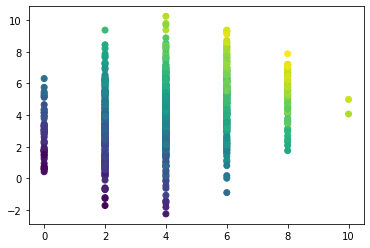

In [2]:
plt.scatter(x, y, c=z)
plt.show()

Use any supervised learning method of your choice to fit a function from $X$ to $Y$ to these data. (So $X$ is the only feature; $Z$ is not used. Note that you are not asked to validate or test your fit here.) Make a new plot that displays both the data points and your fitted function, for $x$ in the range $[0,10]$.

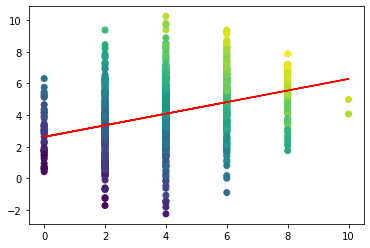

In [3]:
x_t = x.reshape(-1, 1)
# Create linear regression model and fit the feature X to the target variable Y
model = linear_model.LinearRegression().fit(x_t, y)

# Show plots
plt.scatter(x_t, y, c=z)
plt.plot(x_t, model.predict(x_t), color="red")

Look at the code of `f_X`, `f_Y`, `f_Z`, and `generate_observational_data` to answer the following questions.

**Question:** For each endogenous variable, what other endogenous variables are the direct causes? For each such relation between two variables, explain what the presence of this relation means in the real world, where the three variables represent treatment, outcome, and genetic information.

*Your answer here*

Exogenous variables: u_X, u_Y, u_Z
Endogenous variables: X, Y, Z

All variables u_X, u_Y and u_Z are direct cause of X, Y and Z, respectively. Additionally, Z is direct cause of X, and both X and Z are direct cause of Y.

The relations described are coherent with observations of the real world: Z, which represents genetic information of the patient, is not direct cause of any other endogenous variable studied in our set. X, the dosage of medicine received by each patient, is determined partially by the genetic information of the patient (Z). Finally, Y, the degree of effectiveness of the medicine, is determined both by the dosage of medicine received (X) and the genetic information of the patient (Z). 

## Intervening on the system

Now we will consider what happens if we intervene on the system by prescribing certain dosages of the drug. Complete the following function, which is analogous to the function `generate_observational_data`.

In [4]:
def generate_experimental_data(x, num_samples):
    # Generate data under intervention do(X=x[i]). x is a vector of length num_samples.
    # Your code here
    # return (x, y, z)
    z = f_Z(num_samples)
    y = f_Y(z, x, num_samples)
    return (x, y, z)

We will look at interventional data where for each data point, the dosage is chosen uniformly at random from the set $\{0,2,4,8\}$, independently for each individual.

In [5]:
num_samples_exp = 200

# Set the values of x according to the distribution specified above, then generate the whole data
# under the intervention do(X=x).
x_exp = np.random.choice(np.array([0, 2, 4, 8], dtype=int), size=num_samples_exp)
(x_exp, y_exp, z_exp) = generate_experimental_data(x_exp, num_samples_exp)

Plot these experimental data in the same way as before, again including the curve you fit earlier to the observational data.

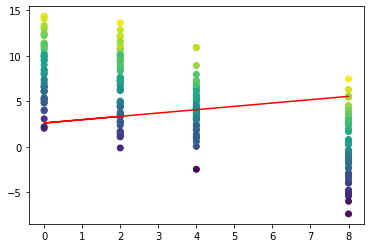

In [6]:
# Your code here
x_exp_t = x_exp.reshape(-1, 1)

plt.scatter(x_exp_t, y_exp, c=z_exp)
plt.plot(x_exp_t, model.predict(x_exp_t), color="red")

Compute the RMSE (root mean squared error) when you use the regression curve you learned earlier to predict $Y$ in these new data. (To put it another way: we used the observational data as training data, and now we are using the experimental data as test data.)

In [7]:
# Your code here
rmse = sqrt(mean_squared_error(y_exp, model.predict(x_exp_t)))
rmse

5.522295438173879

You should see in your plot that the curve we learned from the observational data, does not seem to work well for predicting the outcome $Y$ in the interventional data. This is because the experimental distribution is different from the observational distribution.

**Question:** Look at the product decompositions of the original SCM and the SCM modified by the intervention on $X$. Which factors in the decompositions are the same between the observational and the experimental distribution? In order for your fitted curve to also give good predictions on the experimental data, what conditional distribution would we need to stay the same between the two distributions?

The factors that will remain the same are Y and Z. X won't be the same, since it's being intervened on the experimental data.

Since X is intervened to be equal to x in the experimental data, in order for the predictions to be the same for both inputs the X in the observations should be conditioned to be equal to that exact same x value (so: P(Y | X = x))

The remaining questions use some concepts that we will see in the lectures of week 2 (d-separation and inverse probability weighing).

**Question:** What (marginal or conditional) independence should hold in the experimental data, based on d-separation? Plot the data in a way that illustrates this independence, and explain what property of the plot illustrates the independence.

After intervening on X and setting the value to X = x, we delete the edge connecting Z and X, and Z and X become independent from each other.

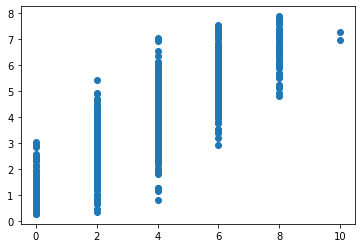

In [8]:
# Observational data (not intervened)
plt.scatter(x, z)

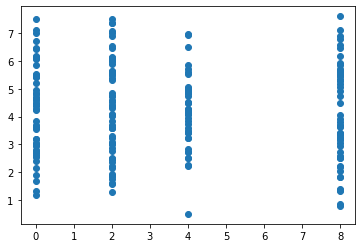

In [9]:
# Experimental data (intervened)
plt.scatter(x_exp, z_exp)

Clearly, after the intervention there is no longer any dependance among the variables X and Z.

Now, we will use the method of inverse probability weighing (section 3.6 in the book) for this task. Using *only the observational data*, fit a logistic regression to predict $X$ using $Z$ as a feature. From this logistic regression, extract estimates for $P(X=x|Z=z)$. (Consult the scikit-learn manual to learn how to do this.) Use these to compute an inverse probability weight for each data point in the observational data set.

In [10]:
# Create logistic regression object (using scikit-learn)
reg_logistic = linear_model.LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=500)

# Fit model to Z (independent variable) and X (dependent variable)
model = reg_logistic.fit(z.reshape(-1, 1), x)

# Extract possible probabilities of the model
possible_probs = model.predict_proba(z.reshape(-1, 1))
possible_probs = pd.DataFrame(data=possible_probs, columns=[0, 2, 4, 6, 8, 10])

# Compute inverse probability weight for each sample
inverse_probs = [1/possible_probs[x[i]][i] for i in range(len(x))]

Now again predict $Y$ in terms of $X$ using only the observational data as training data, but this time weigh each data point with the inverse probability weight. (Machine learning libraries often provides a way to specify a weight for each data point when fitting a model to data; check the manual of the library you are using.) Plot your regression curve in the same plot as the experimental data, as before.

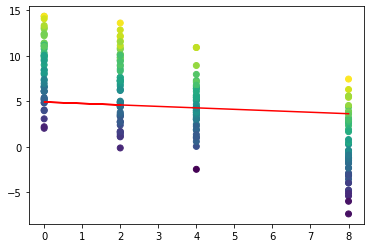

In [11]:
# Fit model to X (independent variable) and Y (dependent variable)
model = linear_model.LinearRegression().fit(x_t, y, sample_weight=inverse_probs)

# Show plots
plt.scatter(x_exp_t, y_exp, c=z_exp)
plt.plot(x_exp_t, model.predict(x_exp_t), color="red")

To verify that these predictions of the causal effect of $X$ on $Y$ are more accurate, again compute the RMSE on the experimental data.

In [12]:
# Your code here
rmse_exp = sqrt(mean_squared_error(y_exp, model.predict(x_exp_t)))
rmse_exp

4.33035728076708

You are done! Before handing in, use Kernel > Restart & run all. This makes sure that the code you hand in works, and that all plots are shown. Submit just one file per team.